### Домашнее задание к лекции «Корреляция и корреляционный анализ»


#### 1. Возьмите датасет Mortality and Water Hardness
www.kaggle.com...r-hardness

Дополнительно будет выложен в ЛК
В этом датасете содержатся данные по средней годовой смертности на
100000 населения и концентрации кальция в питьевой воде для 61
большого города в Англии и Уэльсе. Города дополнительно поделены на
северные и южные.

In [5]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv('water.csv',  na_values='?')
data.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


#### 2 Задача - ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью?

Построить точечный график

Рассчитать коэффициенты корреляции Пирсона и Спирмена

Построить модель линейной регрессии

Рассчитать коэффициент детерминации

Вывести график остатков

<AxesSubplot:xlabel='mortality', ylabel='hardness'>

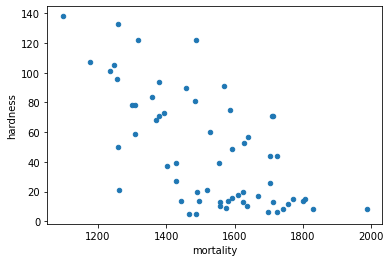

In [9]:
data.plot(kind='scatter', x='mortality', y='hardness')

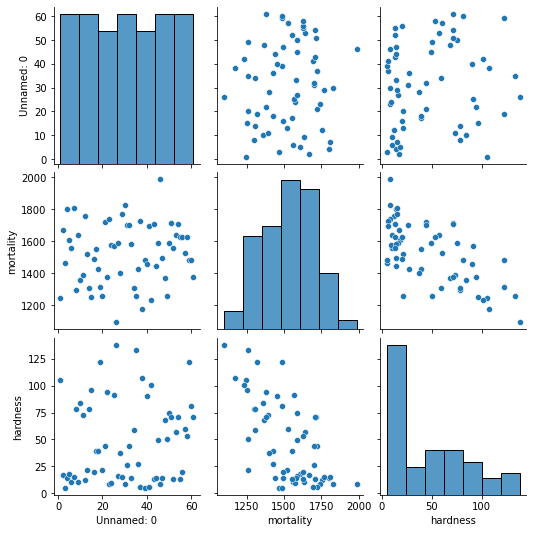

In [10]:
sns.pairplot(data)

In [17]:
# считаем коэф. корреляции Пирсона
data[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [19]:
# считаем коэф. корреляции Спирмана
data[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


In [20]:
# считаем коэф. корреляции Кенделла
data[['mortality', 'hardness']].corr(method='kendall')

,mortality,hardness
mortality,1.000000,-0.453753
hardness,-0.453753,1.000000


In [21]:
# можем посчитать коэффициенты корреляции между всеми показателями
display(data.corr(method='kendall'))
display(data.corr(method='spearman'))
display(data.corr())

,Unnamed: 0,mortality,hardness
Unnamed: 0,1.000000,0.035548,0.089686
mortality,0.035548,1.000000,-0.453753
hardness,0.089686,-0.453753,1.000000


,Unnamed: 0,mortality,hardness
Unnamed: 0,1.000000,0.063011,0.112263
mortality,0.063011,1.000000,-0.631665
hardness,0.112263,-0.631665,1.000000


,Unnamed: 0,mortality,hardness
Unnamed: 0,1.000000,0.077133,0.123075
mortality,0.077133,1.000000,-0.654849
hardness,0.123075,-0.654849,1.000000


<AxesSubplot:>

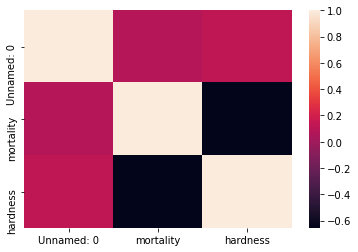

In [22]:
# тепловая карта
sns.heatmap(data.corr())

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = data[['mortality']]
y = data['hardness']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=50)

In [35]:
X_train.shape

(42, 1)

In [36]:
y_train.shape

(42,)

In [37]:
model = LinearRegression()
model.fit(X_train, y_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [38]:
model.coef_

array([-0.10434181])

In [39]:
model.intercept_

200.9913642452602

In [40]:
y_pred = model.predict(X_test)
y_pred

array([26.94921986, 21.10607833, 36.7573503 , 51.99125503, 34.98353948,
       57.20834569, 46.04377168, 72.02488316, 30.18381607, 69.62502145,
       35.40090673, 86.632737  , 45.93942986, 63.46885448, 10.25452976,
       64.61661442, 22.25383827, 50.32178602, 38.73984475])

In [41]:
# сравним наши прогнозы с фактом
res_df = X_test.copy()

res_df['y_pred'] = y_pred
res_df['y_test'] = y_test
res_df

,mortality,y_pred,y_test
1,1668,26.949220,17
36,1724,21.106078,6
23,1574,36.757350,9
17,1428,51.991255,39
44,1591,34.983539,49
60,1378,57.208346,71
59,1485,46.043772,81
41,1236,72.024883,101
8,1637,30.183816,10
34,1259,69.625021,133


In [31]:
model.score(X_test, y_test) # метод возвращает значение коэффициента детерминации

0.4948982822876836

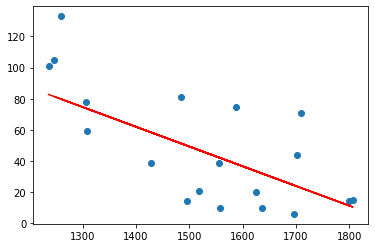

In [32]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [43]:
# Альтернативный способ из statsmodel
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [45]:
X_const = sm.add_constant(X_train) # техническая особенность библиотеки, надо руками добавить константу
X_const

,const,mortality
4,1.0,1609
44,1.0,1591
19,1.0,1260
47,1.0,1369
52,1.0,1640
25,1.0,1096
57,1.0,1627
15,1.0,1491
58,1.0,1486
27,1.0,1402


In [46]:
model = sm.OLS(y_train, X_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               hardness   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     26.31
Date:                Fri, 18 Jun 2021   Prob (F-statistic):           7.83e-06
Time:                        18:04:42   Log-Likelihood:                -201.74
No. Observations:                  42   AIC:                             407.5
Df Residuals:                      40   BIC:                             411.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        239.3678     37.934      6.310      0.0

In [48]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  const        239.367843
mortality     -0.126702
dtype: float64
R2:  0.3967890100912279


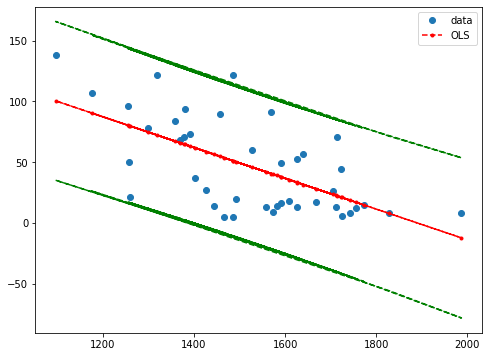

In [49]:
prstd, iv_l, iv_u = wls_prediction_std(results) 
# для каждой точки получаем не просто сам прогноз, но и доверительный интервал
# с увеличением количества факторов, этот интервал будет уменьшаться
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X_const.iloc[:, 1], y_train, 'o', label="data")
ax.plot(X_const.iloc[:, 1], results.fittedvalues, 'r--.', label="OLS")
ax.plot(X_const.iloc[:, 1], iv_u, 'g--')
ax.plot(X_const.iloc[:, 1], iv_l, 'g--')
ax.legend(loc='best');

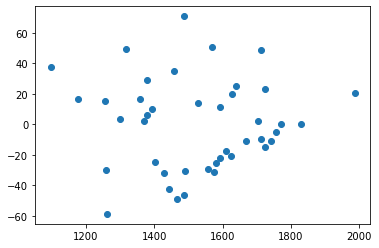

In [50]:
plt.scatter(X_const.iloc[:, 1], results.resid)

(array([3., 1., 9., 5., 6., 7., 5., 2., 3., 1.]),
 array([-58.7233036 , -45.75983806, -32.79637252, -19.83290698,
         -6.86944144,   6.0940241 ,  19.05748964,  32.02095518,
         44.98442072,  57.94788627,  70.91135181]),
 <BarContainer object of 10 artists>)

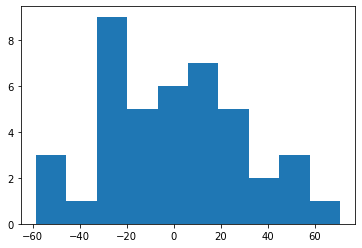

In [51]:
plt.hist(results.resid)

,Unnamed: 0,mortality,hardness
Unnamed: 0,1.000000,0.221880,-0.009288
mortality,0.221880,1.000000,-0.440315
hardness,-0.009288,-0.440315,1.000000


,Unnamed: 0,mortality,hardness
Unnamed: 0,1.000000,0.354591,-0.013685
mortality,0.354591,1.000000,-0.595723
hardness,-0.013685,-0.595723,1.000000


,Unnamed: 0,mortality,hardness
Unnamed: 0,1.000000,0.396333,-0.005337
mortality,0.396333,1.000000,-0.602153
hardness,-0.005337,-0.602153,1.000000


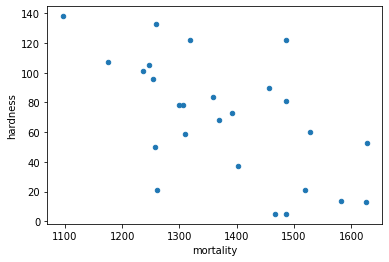

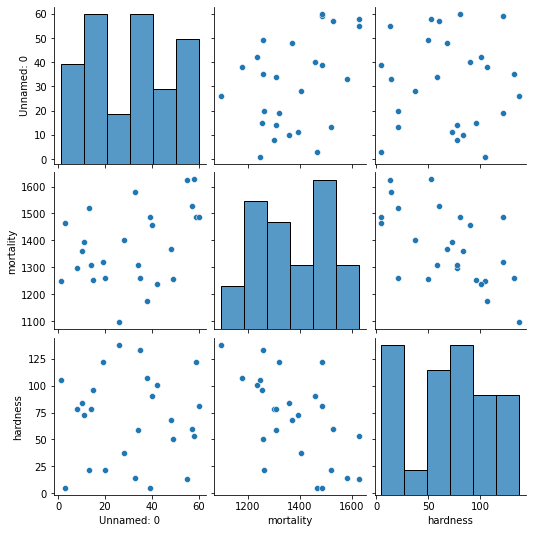

In [59]:
#1 группа Южный регион 

data_South = data[data.location == 'South']
data_South.head()

data_South.plot(kind='scatter', x='mortality', y='hardness')
sns.pairplot(data_South)
# считаем коэф. корреляции Пирсона
data_South[['mortality', 'hardness']].corr()

# считаем коэф. корреляции Спирмана
data_South[['mortality', 'hardness']].corr(method='spearman')

# считаем коэф. корреляции Кенделла
data_South[['mortality', 'hardness']].corr(method='kendall')

# можем посчитать коэффициенты корреляции между всеми показателями
display(data_South.corr(method='kendall'))
display(data_South.corr(method='spearman'))
display(data_South.corr())

[ 26.47703266  75.96293588  44.3521688   86.87617689  87.06433622
 102.86971976  18.19802224  44.54032813]
    mortality      y_pred  y_test
32       1581   26.477033      14
18       1318   75.962936     122
58       1486   44.352169     122
19       1260   86.876177      21
34       1259   87.064336     133
37       1175  102.869720     107
54       1625   18.198022      13
59       1485   44.540328      81
0.16446378819489627


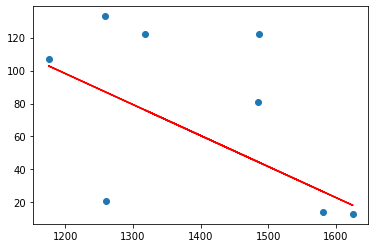

In [63]:
X = data_South[['mortality']]
y = data_South['hardness']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=50)

X_train.shape
y_train.shape

model_South = LinearRegression()
model_South.fit(X_train, y_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

model_South.coef_
model_South.intercept_

y_pred_South = model_South.predict(X_test)
print(y_pred_South)


# сравним наши прогнозы с фактом
res_df_South = X_test.copy()

res_df_South['y_pred'] = y_pred_South
res_df_South['y_test'] = y_test
print(res_df_South)

print(model_South.score(X_test, y_test)) # метод возвращает значение коэффициента детерминации

plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred_South, c='r')

,Unnamed: 0,mortality,hardness
Unnamed: 0,1.000000,-0.080740,0.158447
mortality,-0.080740,1.000000,-0.283058
hardness,0.158447,-0.283058,1.000000


,Unnamed: 0,mortality,hardness
Unnamed: 0,1.000000,-0.109812,0.222145
mortality,-0.109812,1.000000,-0.404208
hardness,0.222145,-0.404208,1.000000


,Unnamed: 0,mortality,hardness
Unnamed: 0,1.000000,-0.103548,0.309195
mortality,-0.103548,1.000000,-0.368598
hardness,0.309195,-0.368598,1.000000


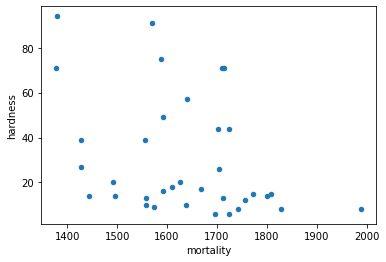

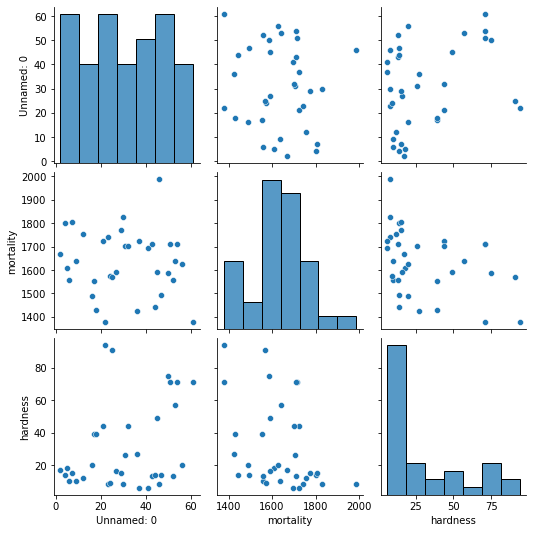

In [64]:
#2 группа Южный регион 

data_North = data[data.location == 'North']
data_North.head()

data_North.plot(kind='scatter', x='mortality', y='hardness')
sns.pairplot(data_North)
# считаем коэф. корреляции Пирсона
data_North[['mortality', 'hardness']].corr()

# считаем коэф. корреляции Спирмана
data_North[['mortality', 'hardness']].corr(method='spearman')

# считаем коэф. корреляции Кенделла
data_North[['mortality', 'hardness']].corr(method='kendall')

# можем посчитать коэффициенты корреляции между всеми показателями
display(data_North.corr(method='kendall'))
display(data_North.corr(method='spearman'))
display(data_North.corr())

[19.98108863 38.44734786 52.93761826 25.10569646 27.84471098 26.69609199
 22.45503724 41.62813892  3.45864617 46.92945736 51.43557803]
    mortality     y_pred  y_test
3        1800  19.981089      14
44       1591  38.447348      49
35       1427  52.937618      27
22       1742  25.105696       8
42       1711  27.844711      13
36       1724  26.696092       6
28       1772  22.455037      15
16       1555  41.628139      39
45       1987   3.458646       8
46       1495  46.929457      14
43       1444  51.435578      14
-1.2770235072082876


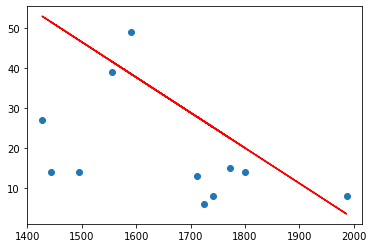

In [65]:
X = data_North[['mortality']]
y = data_North['hardness']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=50)

X_train.shape
y_train.shape

model_North = LinearRegression()
model_North.fit(X_train, y_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

model_North.coef_
model_North.intercept_

y_pred_North = model_North.predict(X_test)
print(y_pred_North)


# сравним наши прогнозы с фактом
res_df_North = X_test.copy()

res_df_North['y_pred'] = y_pred_North
res_df_North['y_test'] = y_test
print(res_df_North)

print(model_North.score(X_test, y_test)) # метод возвращает значение коэффициента детерминации

plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred_North, c='r')